### Financial News Exploratory Data Analysis 

In [3]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [4]:

sys.path.append(os.path.abspath(os.path.join('..')))

In [ ]:
from scripts.utils import *

In [6]:
# Load the data
df = load_data('../data/raw_analyst_ratings.csv')

### Descriptive Statistics:

In [7]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [8]:
df.tail()

,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [10]:
df.shape

(1407328, 6)

#### date length of the data 

In [11]:
print(f"Start date: {df['date'].min()}")
print(f"End date: {df['date'].max()}")



Start date: 2009-02-14 00:00:00
End date: 2020-06-11 17:12:35-04:00


In [12]:
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [13]:
df['date'] = pd.to_datetime(df['date'], format='mixed', utc=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype              
---  ------      --------------    -----              
 0   Unnamed: 0  1407328 non-null  int64              
 1   headline    1407328 non-null  object             
 2   url         1407328 non-null  object             
 3   publisher   1407328 non-null  object             
 4   date        1407328 non-null  datetime64[ns, UTC]
 5   stock       1407328 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 64.4+ MB


In [15]:
#Analyze 'headline' length
headline_stat = headline_length(df)
print("Headline Length Statistics:")
print(headline_stat)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


#### articles per publisher
which publishers contribute most to the news feed.


Top 10 Most Active Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Most Active Publishers '}>

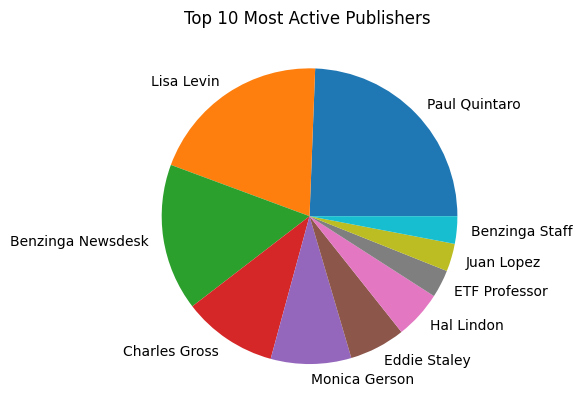

In [16]:
#Count articles per publisher
publisher_counts = articles_per_publisher(df)
print("\nTop 10 Most Active Publishers:")
print(publisher_counts.head(10))

publisher_counts.head(10).plot(kind="pie", title="Top 10 Most Active Publishers ", ylabel='')

#### Analysis of publication dates 
trends in publication dates 

In [17]:
#analyze the publication dates
date_analysis = publication_dates(df)
print("\nTop 5 Days with Most Articles:")
print(date_analysis['top_days'])

print("\nArticle Distribution by Weekday:")
print(date_analysis['weekday_counts'])

print("\n Monthly Trends ")
print(date_analysis['monthly_counts'])



Top 5 Days with Most Articles:
date
2020-03-12    2739
2020-02-28    1620
2020-03-19    1595
2020-02-27    1567
2020-03-06    1428
dtype: int64

Article Distribution by Weekday:
date
Thursday     302619
Wednesday    300922
Tuesday      296505
Monday       265139
Friday       217918
Sunday        16466
Saturday       7759
Name: count, dtype: int64

 Monthly Trends 
date
2009-02-01        1
2009-04-01        3
2009-05-01       12
2009-06-01       40
2009-07-01       75
              ...  
2020-02-01    18878
2020-03-01    24995
2020-04-01    20757
2020-05-01    17992
2020-06-01     6447
Length: 136, dtype: int64


d:\KIFYA AIM\Week 1\Week-1 Project\Financial-news-Stock-Analysis\scripts\utils.py:52: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = df.groupby(df['date'].dt.to_period('M').dt.to_timestamp()).size()


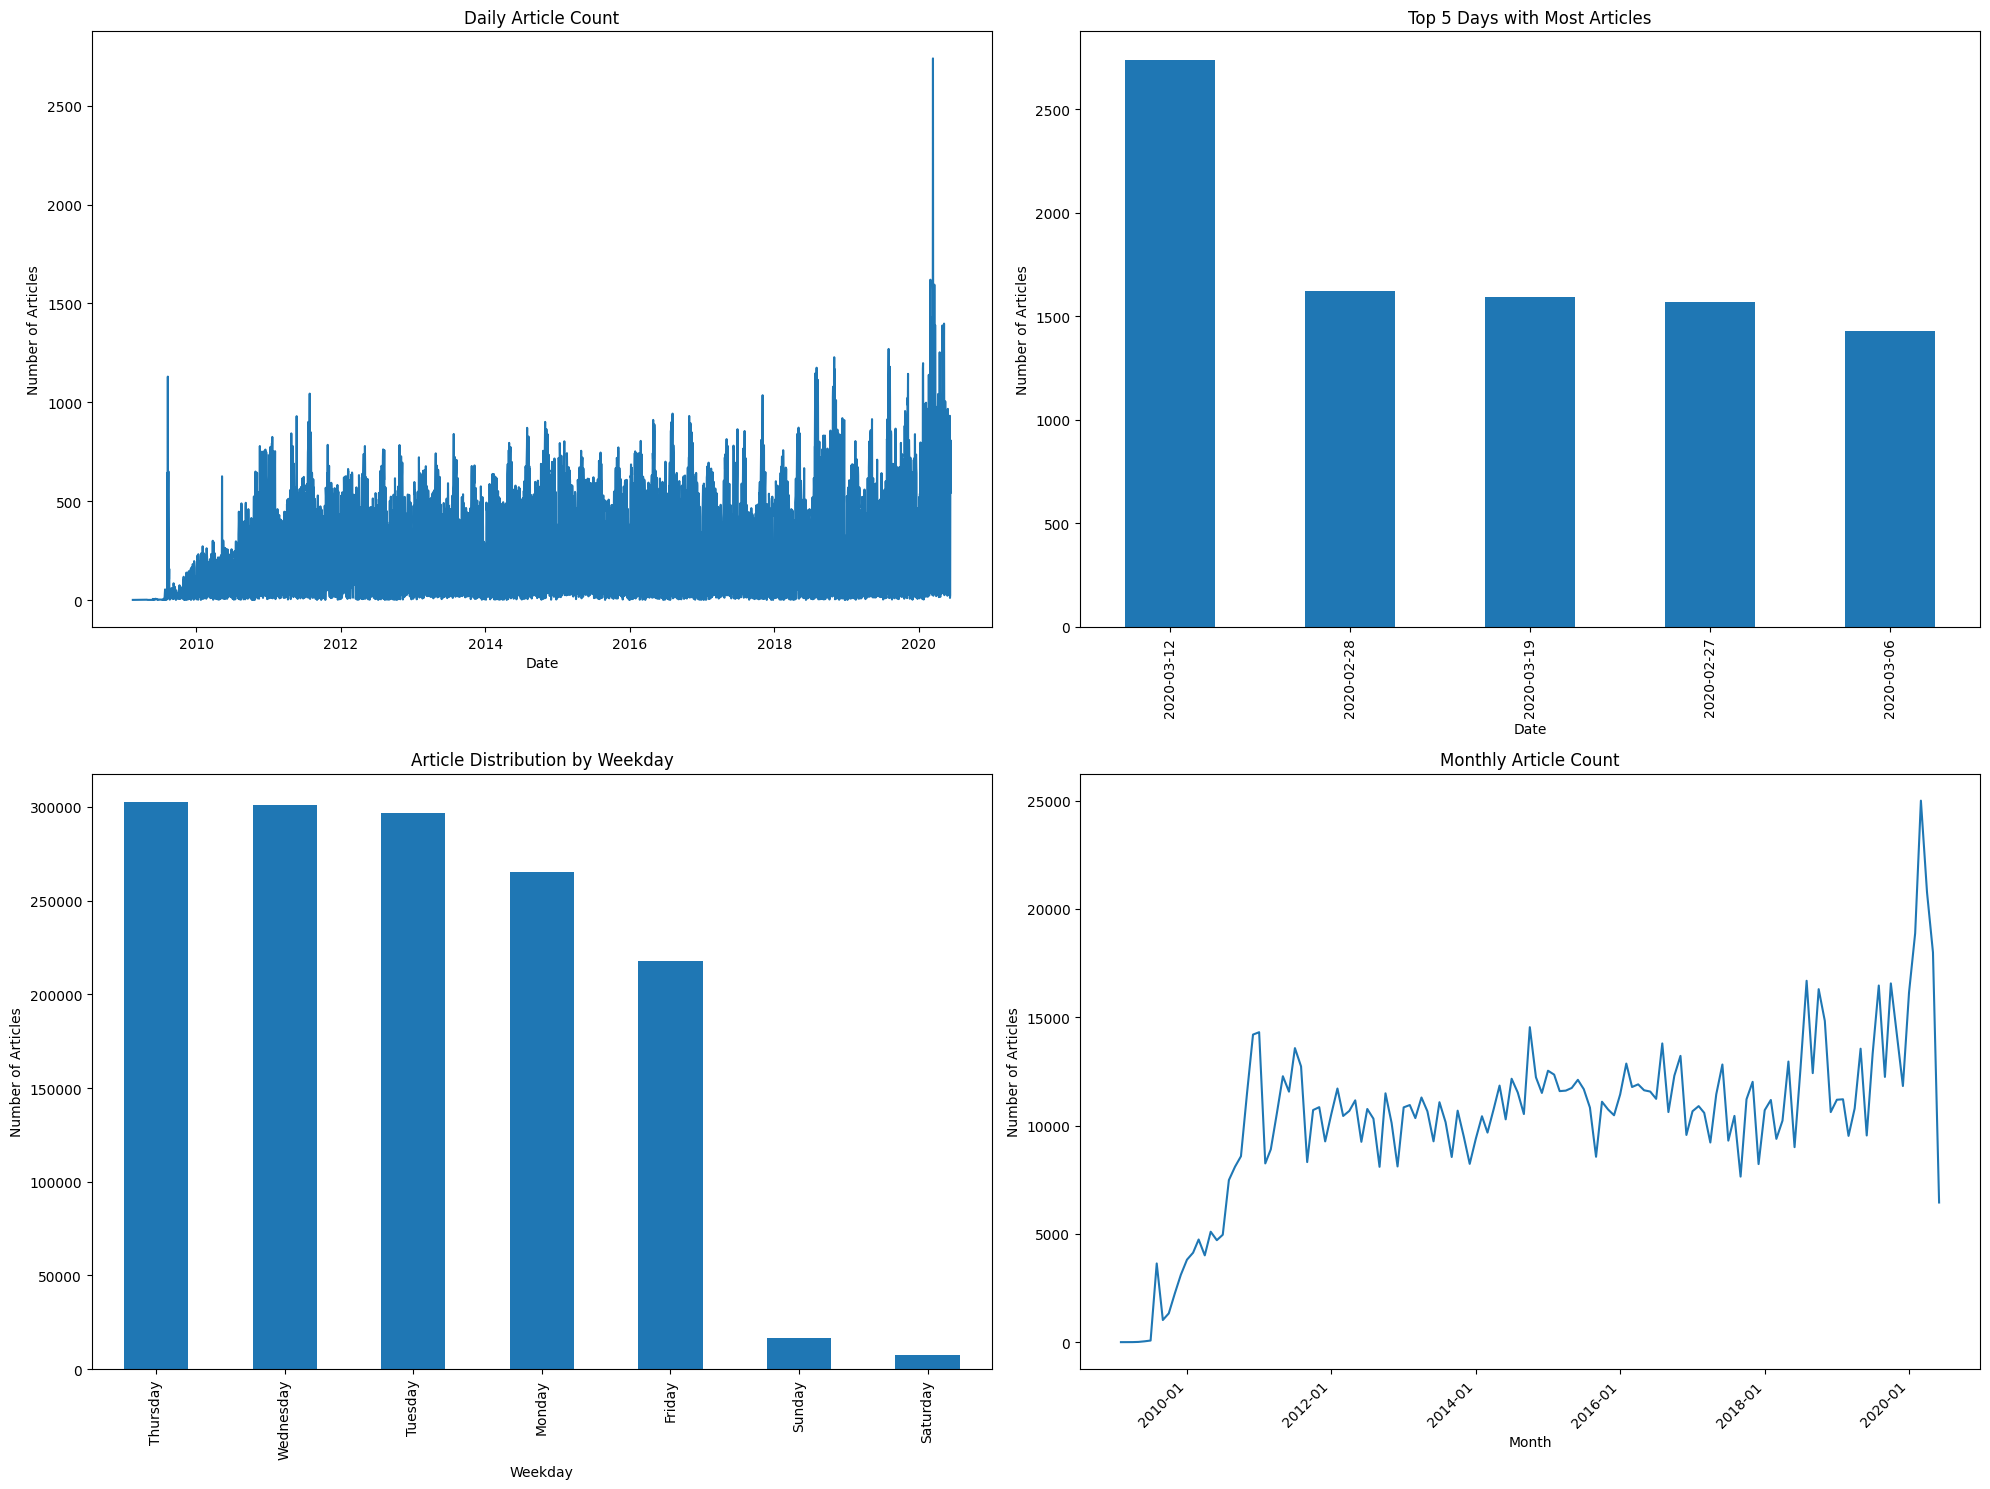

In [18]:
 # Plot publication trends
fig = plot_publication_trends(date_analysis)
plt.show()

### Text Analysis

#### 1. Perform sentiment analysis
sentiment analysis on headlines to gauge the sentiment (positive, negative, neutral) associated with the news.

In [19]:
# Perform sentiment analysis
df = sentiment_analysis(df)

print("Sentiment Distribution:")
print(df['sentiment'].value_counts())

Sentiment Distribution:
sentiment
neutral     731893
positive    448740
negative    226695
Name: count, dtype: int64


In [20]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,month_start,sentiment_scores,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,2020-05-31 00:00:00+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,2020-05-31 00:00:00+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,2020-04-30 00:00:00+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,2020-04-30 00:00:00+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,2020-04-30 00:00:00+00:00,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",positive


In [21]:
# sample sentiment analysis results
print("Sentiment Analysis Results:")
print(df[['headline', 'sentiment']])

Sentiment Analysis Results:
                                                  headline sentiment
0                  Stocks That Hit 52-Week Highs On Friday   neutral
1               Stocks That Hit 52-Week Highs On Wednesday   neutral
2                            71 Biggest Movers From Friday   neutral
3             46 Stocks Moving In Friday's Mid-Day Session   neutral
4        B of A Securities Maintains Neutral on Agilent...  positive
...                                                    ...       ...
1407323             Top Narrow Based Indexes For August 29  positive
1407324  Recap: Wednesday's Top Percentage Gainers and ...  negative
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...   neutral
1407326  Oppenheimer Initiates China Zenix At Outperfor...   neutral
1407327  China Zenix Auto International Opens For Tradi...   neutral

[1407328 rows x 2 columns]


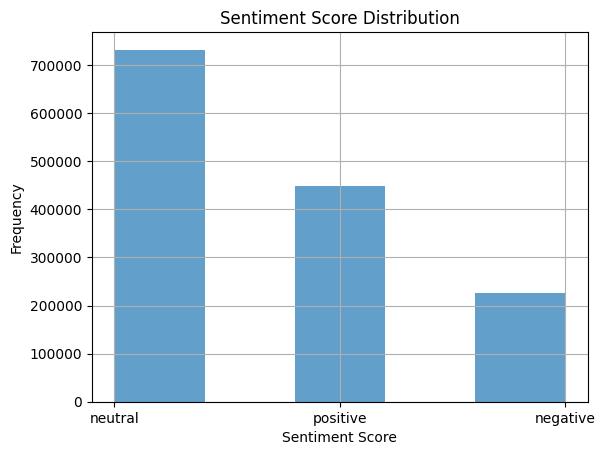

In [22]:
# histogram for the distribution of sentiment scores
df["sentiment"].hist(bins=5, alpha=0.7)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

### 2.   Topic Modeling
Topic Modeling for common keywords or phrases,to discover hidden topical patterns that are present across the data. 

In [23]:
#Perform topic modeling
topics = perform_topic_modeling(df)
print("\nTop 5 Topics:")
#Display top words for each topic
for i, topic in enumerate(topics):
    print(f"Topic {i+1}:")
    for word, prob in topic:
        print(f"  {word}: {prob:.4f}")


Top 5 Topics:
Topic 1:
  earnings: 64829.9021
  stocks: 33587.0209
  benzinga: 32977.6842
  scheduled: 32838.1992
  etfs: 29217.1984
  watch: 25318.5309
  etf: 20908.1978
  2018: 17356.8946
  2019: 15741.9942
  10: 13075.4761
Topic 2:
  shares: 82040.1477
  trading: 54414.5684
  stocks: 36362.8614
  says: 35134.5031
  companies: 34376.9434
  higher: 32167.5871
  week: 29835.5331
  stock: 27354.9868
  lower: 27309.4742
  52: 23777.4618
Topic 3:
  vs: 162099.1990
  est: 140604.1996
  eps: 128896.6694
  reports: 83186.0176
  sales: 77305.9833
  pt: 73066.1885
  buy: 62222.9272
  raises: 57801.3351
  maintains: 52961.0961
  target: 47630.3116
Topic 4:
  new: 46153.2639
  stocks: 43261.1838
  announces: 35639.9138
  week: 31627.4452
  52: 29576.0826
  reports: 25100.9047
  industry: 20981.0872
  set: 19391.5280
  highest: 15870.1965
  low: 15677.6193
Topic 5:
  market: 109874.8879
  mid: 58702.7821
  stocks: 48565.7337
  update: 48540.5619
  session: 45348.0770
  moving: 42289.1989
  day: 

### Time Series Analysis

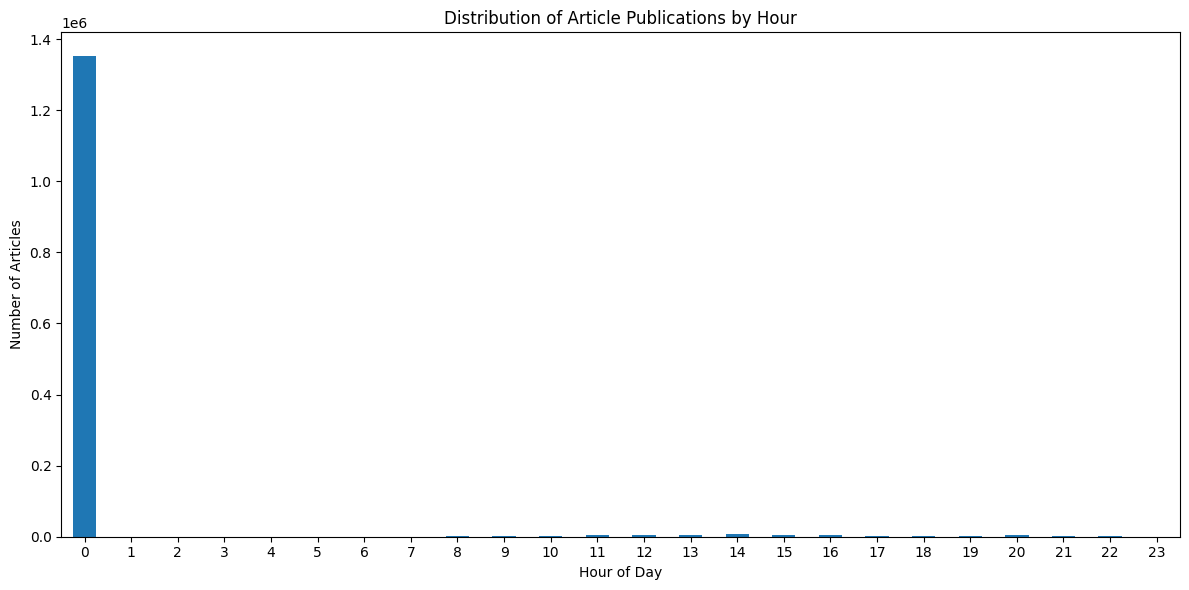

The peak publication hour is 0:00
Days with publication spikes:
date
2009-08-10    1130
2011-05-23     930
2011-07-28    1044
2016-08-04     943
2016-10-27     931
              ... 
2020-05-07    1398
2020-05-08     927
2020-05-13    1005
2020-05-26     967
2020-06-05     932
Length: 85, dtype: int64


In [24]:
# Time Series Analysis
print(analyze_publication_times(df))
spikes = identify_publication_spikes(df)
print("Days with publication spikes:")
print(spikes)

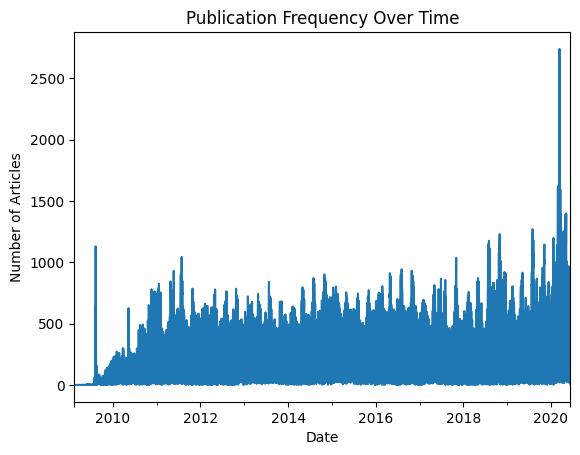

In [26]:
df['publication_date'] = pd.to_datetime(df['date'])
df['publication_day'] = df['publication_date'].dt.day_name()
publication_trends = df.groupby('publication_day').size()

# Time Series Analysis
## Publication frequency over time
df['publication_date'] = pd.to_datetime(df['publication_date'])
df['publication_time'] = df['publication_date'].dt.time
df.set_index('publication_date').resample('D').size().plot()
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

### Publisher Analysis

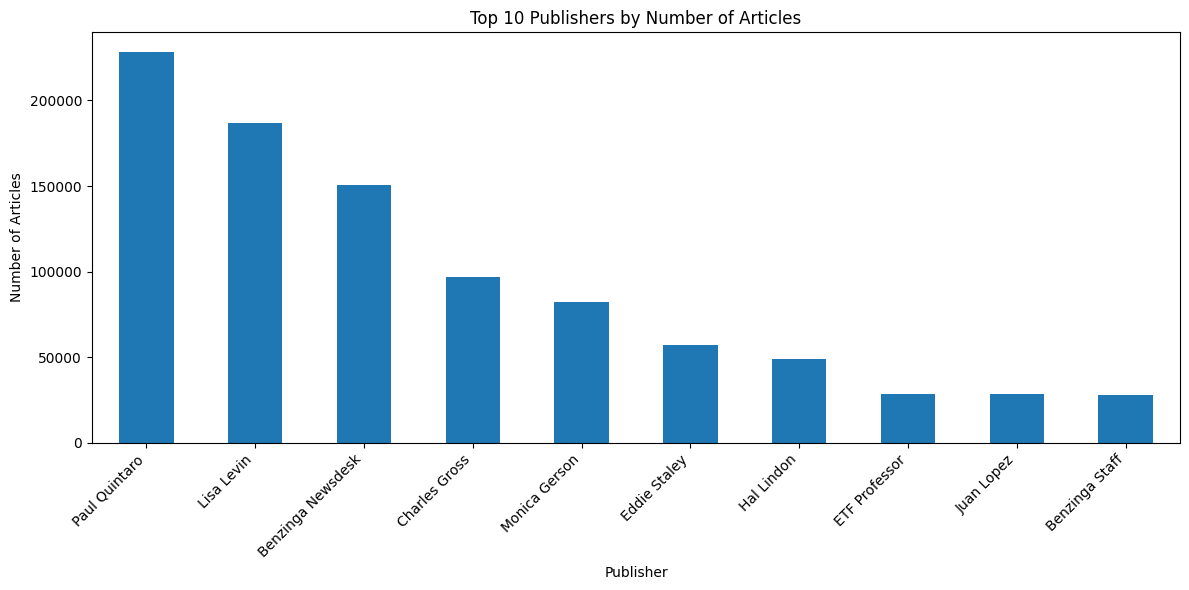


Top publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


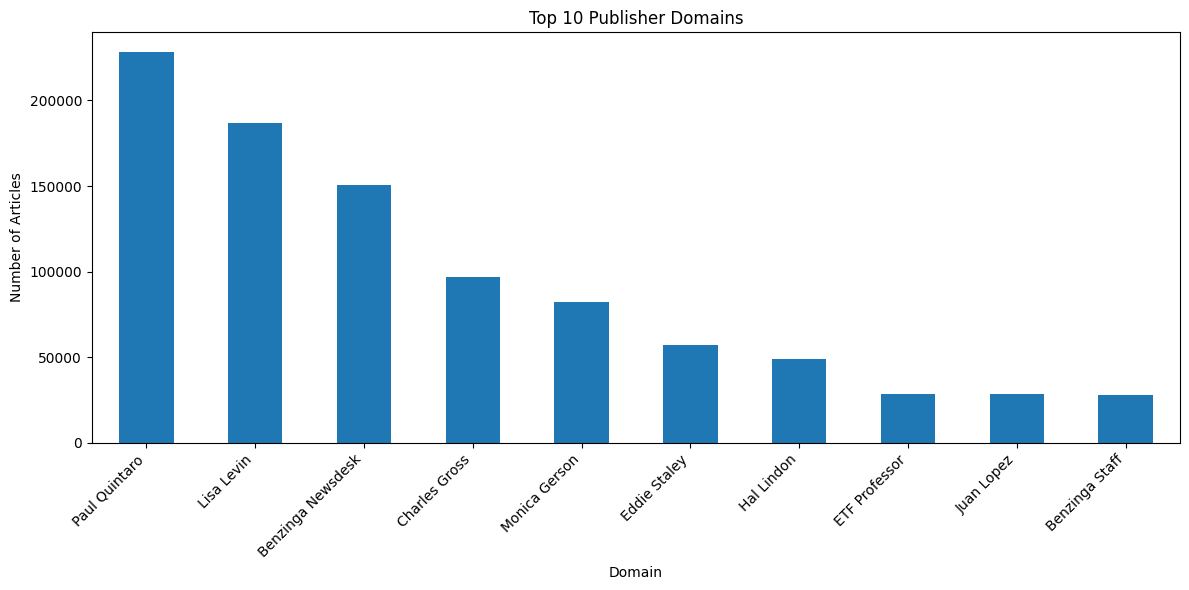


Top domains:
domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


In [28]:
top_publishers = analyze_publishers(df)
print("\nTop publishers:")
print(top_publishers)

domain_counts = analyze_publisher_domains(df)
print("\nTop domains:")
print(domain_counts.head())

#### Analysis of publication times by publishers

In [29]:
publisher_time_analysis = df.groupby('publisher')['publication_time'].value_counts()
print("Analysis of Publishing Times by Publishers:")
print(publisher_time_analysis)

Analysis of Publishing Times by Publishers:
publisher                  publication_time
47ertrends                 00:00:00               18
AARP                       00:00:00                4
                           15:54:21                2
                           16:08:29                1
ABNNewswire                00:00:00               13
                                               ...  
vivek.proactive@gmail.com  13:46:20                1
                           15:44:36                1
wallstreet1928             00:00:00                8
webmaster                  00:00:00            20312
                           13:06:54                1
Name: count, Length: 34333, dtype: int64
